In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from sympy import *
init_printing(use_unicode=True)

# Vamos resolver la ecuación

$$ \frac{dT(t)}{dt}=-k(T(t)-T_a) \text{ con el valor inicial } T(0)=T-0$$

In [7]:
t, k, T0, Ta = sympy.symbols('t, k, T_0, T_a') # valores que involucran la función

T = sympy.Function('T') # Función que queremos aproximar


/tmp/ipykernel_188370/815093683.py:2: SymPyDeprecationWarning: 

Eq(expr) with a single argument with the right-hand side
defaulting to 0 is deprecated. Use Eq(expr, 0) instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-eq-expr
for details.

This has been deprecated since SymPy version 1.5. It
will be removed in a future version of SymPy.

  sympy.Eq(ode) # soluciónd e la ecuacion


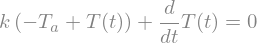

In [8]:
ode = T(t).diff(t) + k*(T(t) - Ta) # ecuación que queremos resolver igualda a cero
sympy.Eq(ode) # creacion de la ecuacion 

In [36]:
de_sol = sympy.dsolve(ode)# solucion general de ela ecuacion
de_sol

In [35]:
ode_sol = sympy.dsolve(ode,ics = {T(0): T0})# Solución particular 
ode_sol

Para acceder a los atributos de de_sol, derecho o izquierdo podemos usar .lhs o .rhs

In [14]:
de_sol.lhs

In [15]:
de_sol.rhs

## otra forma de encontrar a solución 

In [39]:
ics = {T(0): T0}
C_eq = sympy.Eq(de_sol.lhs.subs(t, 0).subs(ics), de_sol.rhs.subs(t, 0 ))
C_eq
C_sol = sympy.solve(C_eq)
C_sol
de_sol.subs(C_sol[0])
de_sol = sympy.dsolve(ode,ics = {T(0): T0})
de_sol

# Solciónde ecuación de segundo orden 

Sea la ecuación 
$$\frac{d^2x(t)}{dt^2}+2*\gamma \omega_0\frac{dx(t)}{dt}+\omega^2_0x(t)=0$$


/tmp/ipykernel_188370/2929002178.py:7: SymPyDeprecationWarning: 

Eq(expr) with a single argument with the right-hand side
defaulting to 0 is deprecated. Use Eq(expr, 0) instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-eq-expr
for details.

This has been deprecated since SymPy version 1.5. It
will be removed in a future version of SymPy.

  sympy.Eq(ode)


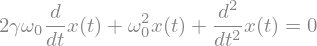

In [40]:
t, omega0, gamma = sympy.symbols("t, omega_0, gamma", positive=True)

x = sympy.Function('x')

ode = x(t).diff(t, 2) + 2 * gamma * omega0 * x(t).diff(t) + omega0**2*x(t)

sympy.Eq(ode)

In [42]:
ode_sol2 = sympy.dsolve(ode) # solcuión de la ecuación
ode_sol2

## solción con valores iniciales 

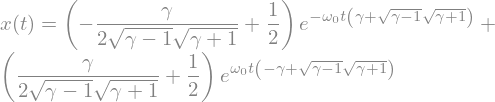

In [44]:
ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}
ode_sol2 = sympy.dsolve(ode,ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}) # solcuión de la ecuación
x_t_sol=ode_sol2
ode_sol2

### cálcular el valor crítico  $\lim_{\gamma\to1}$

In [46]:
x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)
x_t_critical 

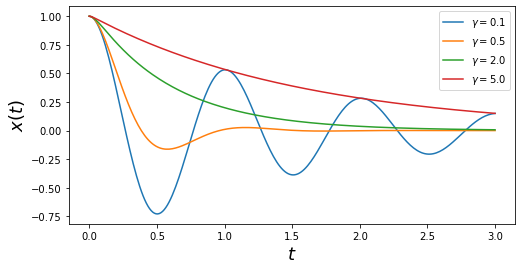

In [48]:
fig, ax = plt.subplots(figsize=(8, 4))

tt = np.linspace(0, 3, 250)

w0 = 2 * sympy.pi

for g in [0.1, 0.5, 1, 2.0, 5.0]:
    if g == 1:
        x_t = sympy.lambdify(t, x_t_critical.subs({omega0: w0}), 'numpy')
    else:
        x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega0: w0, gamma: g}), 'numpy')
        ax.plot(tt, x_t(tt).real, label=r"$\gamma = %.1f$" % g)
        ax.set_xlabel(r"$t$", fontsize=18)
        ax.set_ylabel(r"$x(t)$", fontsize=18)
        ax.legend()

## Campo de direcciones 

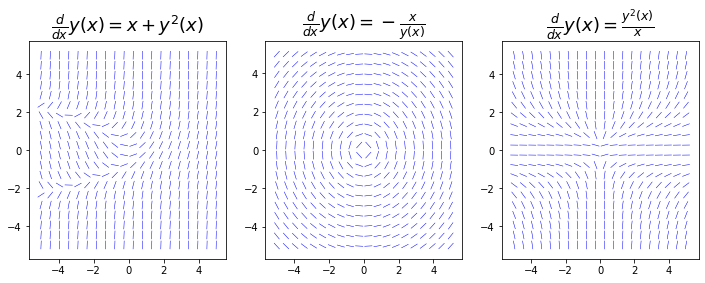

In [54]:
import sympy
import numpy as np
import matplotlib.pyplot as plt


def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)

    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))

    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)

    ax.axis('tight')
    ax.set_title(r"$%s$" %
        (sympy.latex(sympy.Eq(y_x.diff(x), f_xy))), fontsize=18)

    return ax

if __name__ == '__main__':
    x = sympy.symbols("x")
    y = sympy.Function("y")
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    plot_direction_field(x, y(x), y(x)**2 + x, ax=axes[0])
    plot_direction_field(x, y(x), -x / y(x), ax=axes[1])
    plot_direction_field(x, y(x), y(x)**2 / x, ax=axes[2])
    plt.show()

In [100]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)*x + x
ics = {y(0): 0}
ode = y(x).diff(x)-f # ecuación que queremos resolver igualda a cero
ode=sympy.Eq(ode)
ode_sol = sympy.dsolve(y(x).diff(x) -f,ics=ics)
ode_sol
#de_sol=sympy.Eq(ode)
#ode_sol = sympy.dsolve(ode)
#sympy.Eq(y(x).diff(x), f)

#ode_sol = sympy.dsolve(ode,ics = {y(0): 0})


/tmp/ipykernel_188370/2307127188.py:6: SymPyDeprecationWarning: 

Eq(expr) with a single argument with the right-hand side
defaulting to 0 is deprecated. Use Eq(expr, 0) instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-eq-expr
for details.

This has been deprecated since SymPy version 1.5. It
will be removed in a future version of SymPy.

  ode=sympy.Eq(ode)


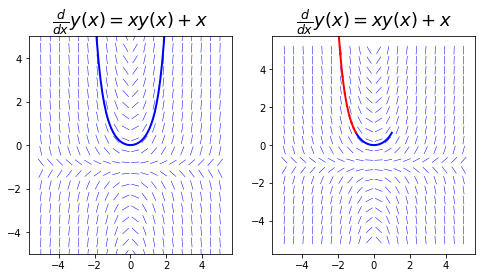

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
plot_direction_field(x, y(x), f, ax=axes[0])
x_vec = np.linspace(-5, 5, 100)
axes[0].plot(x_vec, sympy.lambdify(x, ode_sol.rhs.removeO())(x_vec), 'b', lw=2)
axes[0].set_ylim(-5, 5)

# right panel
plot_direction_field(x, y(x), f, ax=axes[1])
x_vec = np.linspace(-1, 1, 100)
axes[1].plot(x_vec, sympy.lambdify(x, ode_sol.rhs.removeO())(x_vec), 'b', lw=2)
# iteratively resolve the ODE with updated initial conditions
ode_sol_m = ode_sol_p = ode_sol
dx = 0.125
for x0 in np.arange(1, 5, dx):
    x_vec = np.linspace(-x0-dx, -x0, 100)
    ics = {y(-x0): ode_sol_m.rhs.removeO().subs(x, -x0)}
    ode_sol_m = sympy.dsolve(y(x).diff(x) - f, ics=ics, n=6)
    axes[1].plot(x_vec, sympy.lambdify(x, ode_sol_m.rhs.removeO())(x_vec), 'r', lw=2)